In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('kaggle.csv')

In [3]:
df.head()

,Unnamed: 0,review_title,review_text,review_rating
0,0,\nNice Item\n,"\nI don't know about guitars, and it's my firs...",4.0 out of 5 stars
1,1,\nSatisfied with the purchase.\n,\nwood: ok.action: nice and doesn't need much ...,4.0 out of 5 stars
2,2,\nGood for showcase.\n,\nIf you just got new passion but not sure if ...,3.0 out of 5 stars
3,3,\nOk\n,\nOk\n,3.0 out of 5 stars
4,4,\nIF YOU ARE A BEGINNER THEN JUST GO FOR IT\n,\nIf you are a beginner then just go it. It's ...,5.0 out of 5 stars


## drop unwanted column

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.drop('review_title',axis=1,inplace=True)

In [6]:
# extract the numerical rating and store it in a new column
df['rating'] = df['review_rating'].str.split().str[0].astype(float)

In [7]:
df.drop('review_rating',axis=1,inplace=True)

In [8]:
#removing \n from review_text
df['review_text'] = df['review_text'].replace('\n', ' ', regex=True)

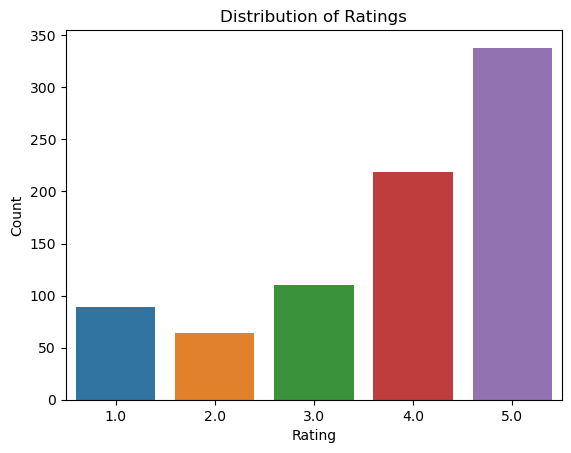

In [9]:
sns.countplot(x='rating', data=df)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

In [10]:
df.dropna(inplace=True)

In [11]:
df = df.reset_index(drop=True) #this will reset your index and drop the old one

In [12]:
import re
import nltk #allow us to download stopwords
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#review = str(df['review_text'][i])
stop_words = set(stopwords.words('english'))
corpus = []
for i in range (0, len(df)):
    review = re.sub('[^a-zA-Z]',' ',df['review_text'][i])
    review = review.lower()
    review=review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in stop_words]
    review=' '.join(review)
    corpus.append(review)

In [13]:
corpus

['know guitar first guitar found today impress guitar true valu money play well atleast nice show piec hang wall',
 'wood ok action nice need much effort pick nice flexibl enough product mark steel string instead nylon mention come untun take hard time tune properli tune sound good begggin want learn guitar good deal',
 'got new passion sure last long much dedic buy know music want invest good go atleast k guitar',
 'ok',
 'beginn go worth guitar year say still pretti good condit want learn guitar sign go',
 'great valu money still look like repair place found seem repair sold good beginn long term use alway lose string littl bit band occur',
 'price guitar good much heavi easi carri side guitar handl look lit bit damag transit overal give star bqck side guitar also littl bit vanish hope seller take word serious',
 'nice guitar',
 'good cheap deliveri time product deliev also good issu guitar firt string work th fret make feel frustrat u r beginn highli recommend guitar bugdet go yamah

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x = cv.fit_transform(corpus).toarray()
y =df['rating'].values

## splitting the Dataset

In [15]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)                                   

## NAIVE BAYES MODEL

In [16]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(xtrain,ytrain)

GaussianNB()

In [17]:
ypred=classifier.predict(xtest)
print(np.concatenate((ypred.reshape(len(ypred),1),ytest.reshape(len(ytest),1)),1))

[[4. 5.]
 [2. 2.]
 [5. 5.]
 [4. 5.]
 [2. 4.]
 [5. 4.]
 [5. 4.]
 [3. 4.]
 [3. 5.]
 [3. 5.]
 [3. 1.]
 [4. 3.]
 [5. 3.]
 [3. 4.]
 [5. 1.]
 [1. 1.]
 [3. 5.]
 [3. 4.]
 [1. 1.]
 [3. 2.]
 [5. 5.]
 [5. 3.]
 [3. 5.]
 [3. 4.]
 [5. 5.]
 [3. 5.]
 [3. 5.]
 [1. 3.]
 [3. 5.]
 [3. 5.]
 [2. 4.]
 [3. 3.]
 [4. 3.]
 [2. 4.]
 [2. 5.]
 [3. 4.]
 [3. 5.]
 [5. 5.]
 [3. 2.]
 [5. 5.]
 [2. 2.]
 [5. 5.]
 [5. 4.]
 [4. 4.]
 [1. 1.]
 [5. 5.]
 [3. 4.]
 [2. 4.]
 [3. 4.]
 [3. 4.]
 [3. 5.]
 [3. 5.]
 [3. 5.]
 [2. 4.]
 [1. 1.]
 [4. 4.]
 [3. 5.]
 [3. 4.]
 [3. 4.]
 [5. 5.]
 [4. 4.]
 [3. 4.]
 [3. 5.]
 [3. 2.]
 [2. 3.]
 [3. 4.]
 [3. 5.]
 [5. 5.]
 [5. 5.]
 [3. 2.]
 [4. 5.]
 [3. 5.]
 [1. 1.]
 [4. 5.]
 [3. 5.]
 [3. 4.]
 [3. 5.]
 [4. 5.]
 [4. 5.]
 [4. 5.]
 [3. 5.]
 [1. 4.]
 [3. 5.]
 [3. 5.]
 [4. 3.]
 [3. 4.]
 [1. 4.]
 [1. 1.]
 [3. 4.]
 [5. 5.]
 [3. 1.]
 [3. 5.]
 [3. 5.]
 [4. 5.]
 [3. 4.]
 [3. 3.]
 [5. 1.]
 [4. 5.]
 [3. 5.]
 [4. 5.]
 [2. 1.]
 [4. 3.]
 [3. 2.]
 [3. 4.]
 [4. 3.]
 [2. 1.]
 [3. 3.]
 [1. 1.]
 [4. 5.]
 [3. 5.]
 [4. 4.]
 

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy_score(ytest,ypred)

0.24390243902439024

## LOGISTIC REGRESSION

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lg=LogisticRegression()

In [22]:
classifier=LogisticRegression()
classifier.fit(xtrain,ytrain)

LogisticRegression()

In [23]:
ypred=classifier.predict(xtest)
print(np.concatenate((ypred.reshape(len(ypred),1),ytest.reshape(len(ytest),1)),1))

[[5. 5.]
 [5. 2.]
 [5. 5.]
 [5. 5.]
 [5. 4.]
 [5. 4.]
 [4. 4.]
 [4. 4.]
 [5. 5.]
 [5. 5.]
 [4. 1.]
 [4. 3.]
 [5. 3.]
 [5. 4.]
 [1. 1.]
 [4. 1.]
 [5. 5.]
 [5. 4.]
 [2. 1.]
 [4. 2.]
 [5. 5.]
 [5. 3.]
 [5. 5.]
 [5. 4.]
 [5. 5.]
 [4. 5.]
 [5. 5.]
 [4. 3.]
 [5. 5.]
 [5. 5.]
 [4. 4.]
 [1. 3.]
 [1. 3.]
 [5. 4.]
 [4. 5.]
 [5. 4.]
 [4. 5.]
 [5. 5.]
 [5. 2.]
 [5. 5.]
 [1. 2.]
 [5. 5.]
 [5. 4.]
 [4. 4.]
 [1. 1.]
 [4. 5.]
 [5. 4.]
 [5. 4.]
 [4. 4.]
 [4. 4.]
 [5. 5.]
 [5. 5.]
 [5. 5.]
 [4. 4.]
 [1. 1.]
 [5. 4.]
 [4. 5.]
 [5. 4.]
 [4. 4.]
 [5. 5.]
 [5. 4.]
 [1. 4.]
 [5. 5.]
 [1. 2.]
 [4. 3.]
 [5. 4.]
 [5. 5.]
 [4. 5.]
 [5. 5.]
 [3. 2.]
 [4. 5.]
 [5. 5.]
 [1. 1.]
 [5. 5.]
 [5. 5.]
 [5. 4.]
 [5. 5.]
 [4. 5.]
 [5. 5.]
 [5. 5.]
 [4. 5.]
 [5. 4.]
 [4. 5.]
 [5. 5.]
 [5. 3.]
 [5. 4.]
 [3. 4.]
 [1. 1.]
 [4. 4.]
 [5. 5.]
 [2. 1.]
 [5. 5.]
 [5. 5.]
 [5. 5.]
 [4. 4.]
 [4. 3.]
 [1. 1.]
 [5. 5.]
 [3. 5.]
 [4. 5.]
 [5. 1.]
 [4. 3.]
 [5. 2.]
 [5. 4.]
 [4. 3.]
 [1. 1.]
 [5. 3.]
 [1. 1.]
 [5. 5.]
 [5. 5.]
 [5. 4.]
 

In [24]:
accuracy_score(ytest,ypred)

0.47560975609756095

## RANDOM FOREST

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [27]:
from scipy.stats import randint

In [28]:
param_dist = {"n_estimators": [100,200],
              "max_depth": [200,250,300],
              "max_features": randint(1, 11),
              "min_samples_split": randint(2, 11),
              "min_samples_leaf": randint(1, 11),
              "bootstrap": [True, False]}


In [29]:
rfc = RandomForestClassifier(random_state=42)

In [30]:
rfc_random = RandomizedSearchCV(estimator=rfc,
                                param_distributions=param_dist,
                                n_iter=100,
                                cv=3,
                                random_state=42,
                                n_jobs=-1)

In [31]:
rfc_random.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [200, 250, 300],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D5A20C0190>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D5A20C17B0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001D5A20C0640>,
                                        'n_estimators': [100, 200]},
                   random_state=42)

In [32]:
print("Best parameters found:", rfc_random.best_params_)

Best parameters found: {'bootstrap': True, 'max_depth': 200, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}


In [33]:
rfc = RandomForestClassifier(random_state=42,n_estimators=500,max_depth=None,max_features='auto',min_samples_split=10,min_samples_leaf=1,bootstrap=False)

In [34]:

rfc.fit(xtrain,ytrain)

C:\Users\jonah\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(bootstrap=False, max_features='auto',
                       min_samples_split=10, n_estimators=500, random_state=42)

In [35]:
ypred=rfc.predict(xtest)
print(np.concatenate((ypred.reshape(len(ypred),1),ytest.reshape(len(ytest),1)),1))

[[5. 5.]
 [5. 2.]
 [5. 5.]
 [3. 5.]
 [5. 4.]
 [5. 4.]
 [4. 4.]
 [5. 4.]
 [5. 5.]
 [5. 5.]
 [5. 1.]
 [4. 3.]
 [5. 3.]
 [5. 4.]
 [1. 1.]
 [4. 1.]
 [5. 5.]
 [5. 4.]
 [4. 1.]
 [3. 2.]
 [5. 5.]
 [5. 3.]
 [5. 5.]
 [5. 4.]
 [5. 5.]
 [5. 5.]
 [5. 5.]
 [5. 3.]
 [5. 5.]
 [5. 5.]
 [4. 4.]
 [1. 3.]
 [1. 3.]
 [4. 4.]
 [5. 5.]
 [5. 4.]
 [4. 5.]
 [3. 5.]
 [5. 2.]
 [5. 5.]
 [1. 2.]
 [5. 5.]
 [5. 4.]
 [4. 4.]
 [1. 1.]
 [4. 5.]
 [5. 4.]
 [4. 4.]
 [5. 4.]
 [4. 4.]
 [5. 5.]
 [5. 5.]
 [5. 5.]
 [4. 4.]
 [1. 1.]
 [5. 4.]
 [4. 5.]
 [5. 4.]
 [2. 4.]
 [5. 5.]
 [5. 4.]
 [1. 4.]
 [5. 5.]
 [1. 2.]
 [4. 3.]
 [5. 4.]
 [5. 5.]
 [4. 5.]
 [5. 5.]
 [4. 2.]
 [4. 5.]
 [5. 5.]
 [1. 1.]
 [5. 5.]
 [5. 5.]
 [5. 4.]
 [5. 5.]
 [4. 5.]
 [5. 5.]
 [5. 5.]
 [4. 5.]
 [5. 4.]
 [4. 5.]
 [5. 5.]
 [5. 3.]
 [5. 4.]
 [1. 4.]
 [1. 1.]
 [4. 4.]
 [5. 5.]
 [2. 1.]
 [5. 5.]
 [5. 5.]
 [5. 5.]
 [4. 4.]
 [5. 3.]
 [1. 1.]
 [5. 5.]
 [5. 5.]
 [4. 5.]
 [5. 1.]
 [4. 3.]
 [5. 2.]
 [5. 4.]
 [4. 3.]
 [1. 1.]
 [4. 3.]
 [1. 1.]
 [5. 5.]
 [5. 5.]
 [5. 4.]
 

In [36]:
accuracy_score(ytest,ypred) #bad model

0.4695121951219512

## ADABOOST

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

In [41]:
abc = AdaBoostClassifier()

In [42]:
param_grid = {'n_estimators': [50, 100, 150],
              'learning_rate': [0.01, 0.1, 1.0]}

In [43]:
grid_search = GridSearchCV(estimator=abc, param_grid=param_grid, cv=5)
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 150]})

In [44]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.1, 'n_estimators': 150}


In [45]:
abc = AdaBoostClassifier(learning_rate=0.1,n_estimators=150)

In [50]:
abc.fit(xtrain, ytrain)

AdaBoostClassifier(learning_rate=0.1, n_estimators=150)

In [51]:
ypred=abc.predict(xtest)

In [52]:
accuracy_score(ytest,ypred)

0.4817073170731707

## Gradient boost

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
gbc=GradientBoostingClassifier()

In [57]:
param_grid = {'learning_rate': [0.01, 0.1, 1.0],
              'n_estimators': [50, 100, 150],
              'max_depth': [3, 4, 5]}

In [58]:
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5)
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [50, 100, 150]})

In [59]:
print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}


In [60]:
gbc=GradientBoostingClassifier(learning_rate=0.1,max_depth=3,n_estimators=50)

In [61]:
gbc.fit(xtrain,ytrain)

GradientBoostingClassifier(n_estimators=50)

In [62]:
ypred=gbc.predict(xtest)

In [63]:
accuracy_score(ytest,ypred)

0.4451219512195122

## ADABOOST IS A BETTER MODEL